In [32]:
import os
import bigfish
import bigfish.stack as stack
import bigfish.segmentation as segmentation
import bigfish.plot as plot
print("Big-FISH version: {0}".format(bigfish.__version__))
import numpy as np
import bigfish.detection as detection
import cv2
import matplotlib.pyplot as plt
from skimage.filters import threshold_adaptive

Big-FISH version: 0.5.0


## DeltaVision data

The deltavision microscope produces two types of files, deconvolved and non-deconvolved. I will read these files in separately for the first image I acquired in my experiment. The decon_image variable will hold the deconvolved image and raw_image will hold the non-deconvolved image

In [8]:
decon_path = '/Volumes/MATH_BACKUP/lipofectamine_controls/lipo6uLnoDNA02_003_R3D_D3D.dv'
decon_image = stack.read_dv(decon_path)
raw_path = '/Volumes/MATH_BACKUP/lipofectamine_controls/lipo6uLnoDNA02_003_R3D.dv'
raw_image = stack.read_dv(raw_path)

Next, we will take a look at the shape of a deconvolved image. For these images, I acquired 4 channels (3 fluorescent channels + 1 brightfield), 30 z-sections, and 1024x1024 pixels.

In [10]:
print('---DECONVOLVED---')
print(decon_image.shape)
print('n channels: ', decon_image.shape[0])
print('n z-planes: ', decon_image.shape[1])
print('x-y dimensions: ', decon_image.shape[2], ' x ', decon_image.shape[3])

print('---RAW---')
print(raw_image.shape)
print('Note that the order is different in the raw images.  The raw images start with the number of z-planes followed by  the number of channels')
print('n channels: ', decon_image.shape[1])
print('n z-planes: ', decon_image.shape[0])
print('x-y dimensions: ', decon_image.shape[2], ' x ', decon_image.shape[3])

---DECONVOLVED---
(4, 30, 1024, 1024)
n channels:  4
n z-planes:  30
x-y dimensions:  1024  x  1024
---RAW---
(30, 4, 1024, 1024)
Note that the order is different in the raw images.  The raw images start with the number of z-planes followed by  the number of channels
n channels:  30
n z-planes:  4
x-y dimensions:  1024  x  1024


## Slicing

DAPI was the first channel in my image.  To access this channel, I can simply slice this array.

In [11]:
nuc = decon_image[0,...]
print(nuc.shape)
print('n z-planes: ', nuc.shape[0])
print('x-y dimensions: ', nuc.shape[1], ' x ', nuc.shape[2])

(30, 1024, 1024)
n z-planes:  30
x-y dimensions:  1024  x  1024


Since the images has 30 z-planes, I will need to collapse the z-planes via some sort of projection.

In [12]:
max_projection = np.max(nuc, axis=0)
mean_projection = np.mean(nuc, axis=0)
min_projection = np.min(nuc, axis=0)



Text(0.5, 1.0, 'min_projection')

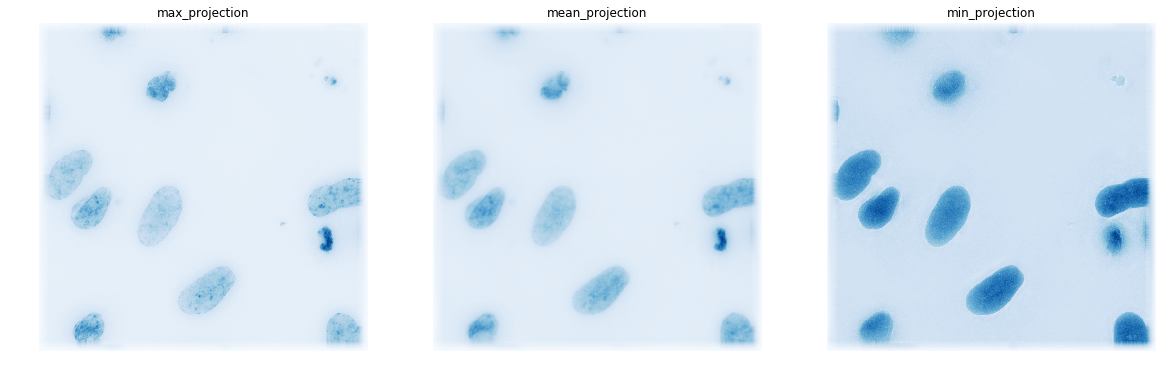

In [14]:
fig = plt.figure(figsize=(20, 20))

# max projection 
rows, columns = 1,3
fig.add_subplot(rows, columns, 1)
plt.imshow(max_projection, cmap='Blues')
plt.axis('off')
plt.title("max_projection")

# mean projection 
fig.add_subplot(rows, columns, 2)
plt.imshow(mean_projection, cmap='Blues')
plt.axis('off')
plt.title("mean_projection")

# min projection
fig.add_subplot(rows, columns, 3)
plt.imshow(min_projection, cmap='Blues')
plt.axis('off')
plt.title("min_projection")




Im going to go ahead and make the above projection and plotting code more generalizable by wrapping them in a function

In [15]:
def extract_channels(img):
    nuc = img[0,...]
    cyt = img[1,...]
    brightfield = img[3,...]
    return nuc, cyt, brightfield

def projections(channel):
    max_projection = np.max(channel, axis=0)
    mean_projection = np.mean(channel, axis=0)
    min_projection = np.min(channel, axis=0)
    return [max_projection, mean_projection, min_projection]

def plot_projections(proj, cmap):
    fig = plt.figure(figsize=(20, 20))

    # max projection 
    rows, columns = 1,3
    fig.add_subplot(rows, columns, 1)
    plt.imshow(proj[0], cmap=cmap)
    plt.axis('off')
    plt.title("max_projection")

    # mean projection 
    fig.add_subplot(rows, columns, 2)
    plt.imshow(proj[1], cmap=cmap)
    plt.axis('off')
    plt.title("mean_projection")

    # min projection
    fig.add_subplot(rows, columns, 3)
    plt.imshow(proj[2], cmap=cmap)
    plt.axis('off')
    plt.title("min_projection")
    
    return None
    
    


In [16]:
nuc, cyt, brightfield = extract_channels(decon_image)

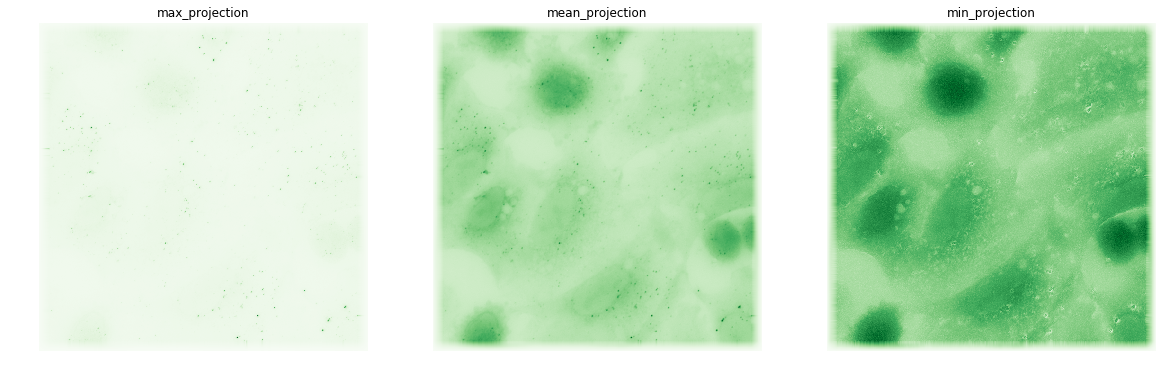

In [17]:
project = projections(cyt)
plot_projections(project, 'Greens')

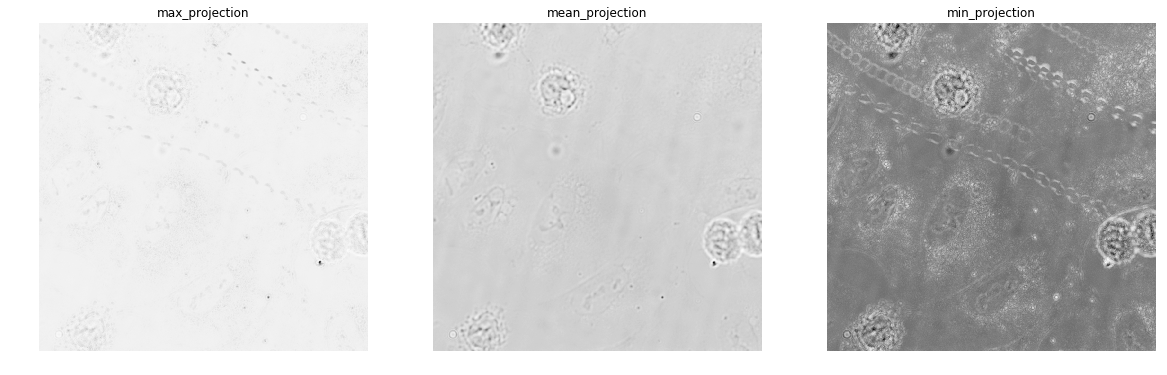

In [18]:
project = projections(brightfield)
plot_projections(project, 'Greys')

# Detecting nuclei

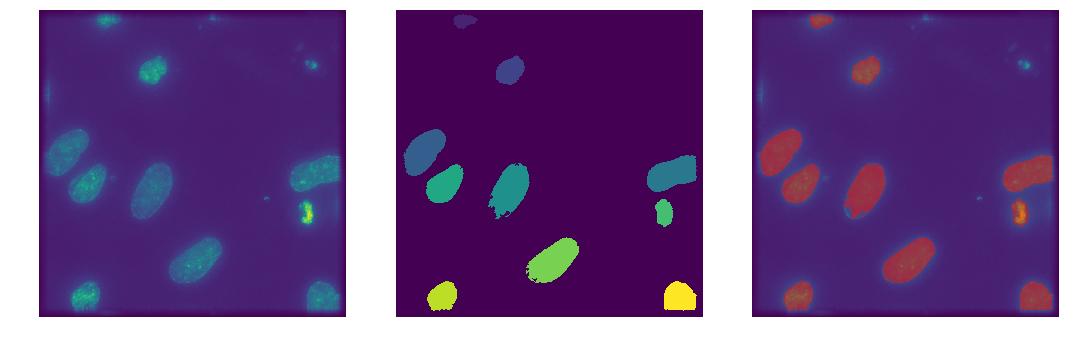

In [21]:
# thresholding
nuc_max_proj = stack.maximum_projection(nuc)
nuc_mask = segmentation.thresholding(nuc_max_proj, threshold=400)
nuc_mask = segmentation.clean_segmentation(nuc_mask, small_object_size=2000, fill_holes=True)


# labeling
nuc_label = segmentation.label_instances(nuc_mask)


plot.plot_segmentation(nuc_max_proj, nuc_label, rescale=True, framesize=(15, 5))

This seems to do a reasonable job for this image, but lets see how this generalizes to as a function of the thresholding metric

theshold =  0


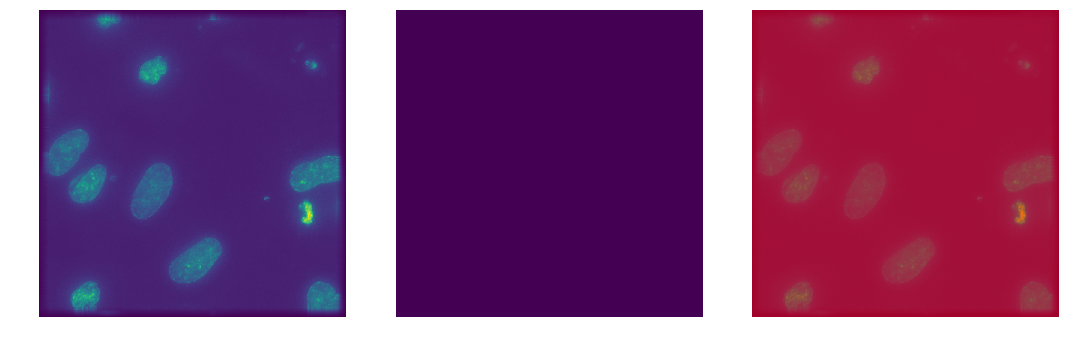

theshold =  50


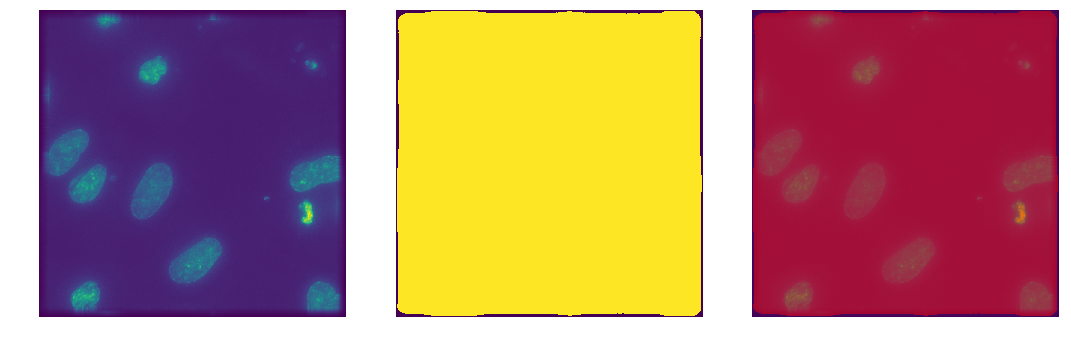

theshold =  100


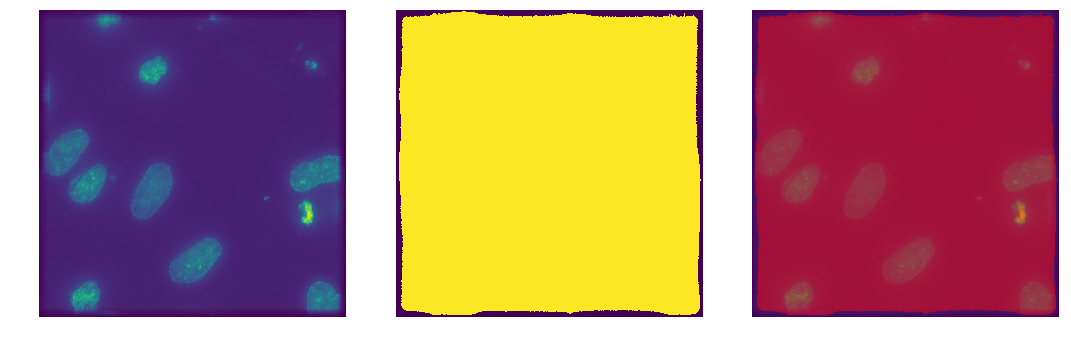

theshold =  150


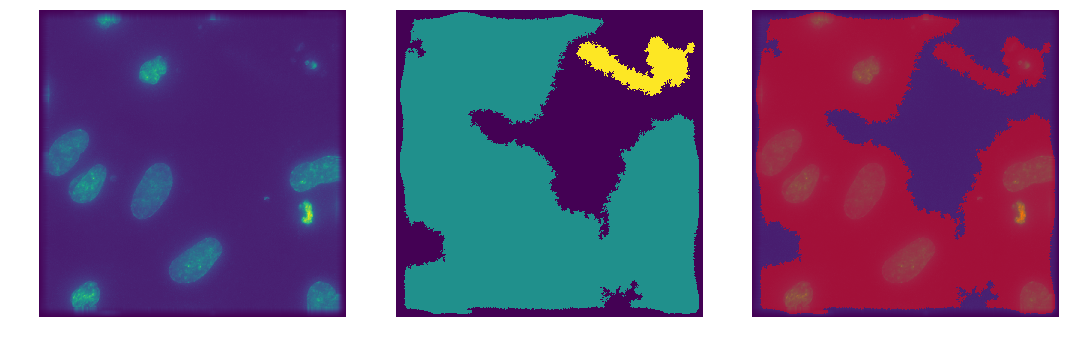

theshold =  200


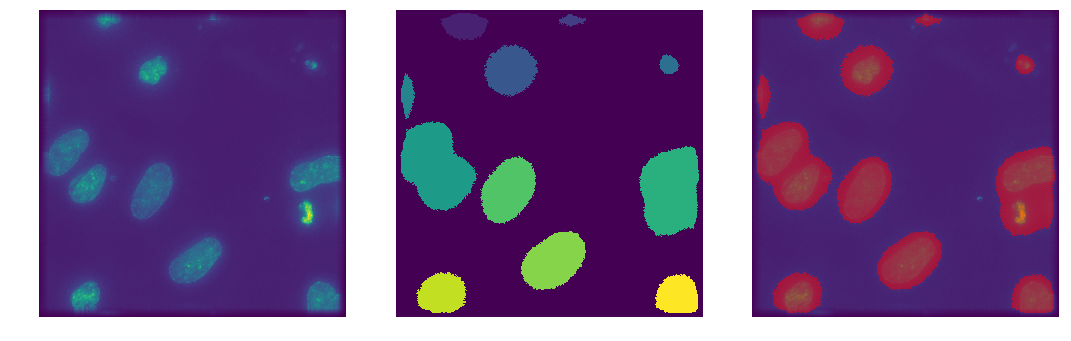

theshold =  250


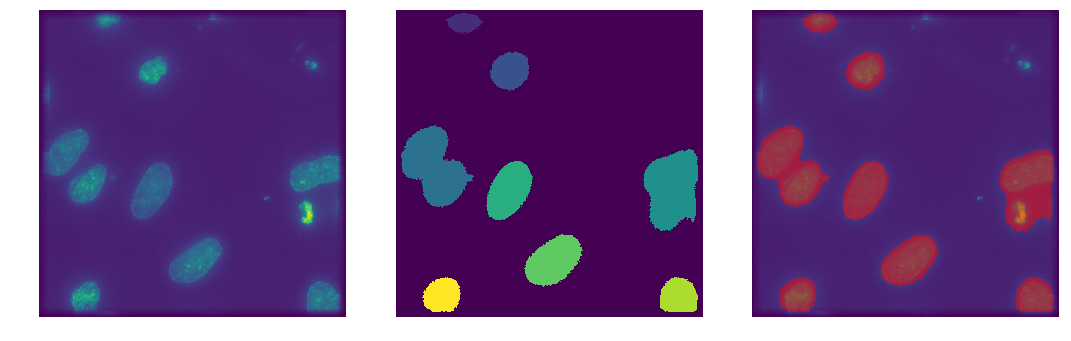

theshold =  300


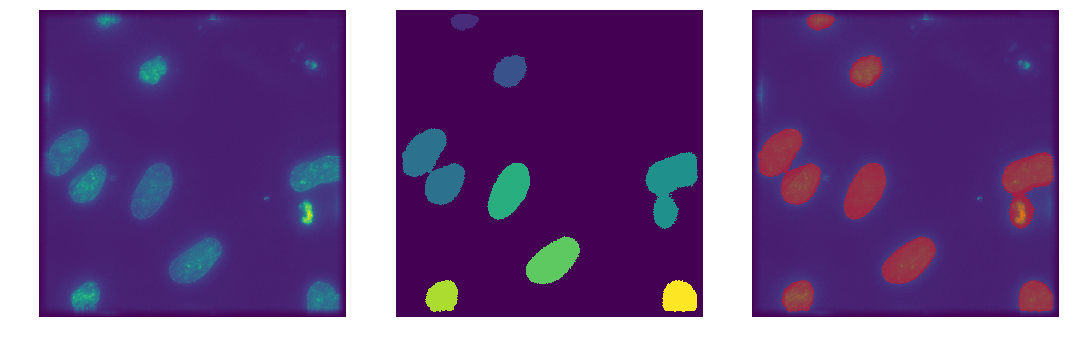

theshold =  350


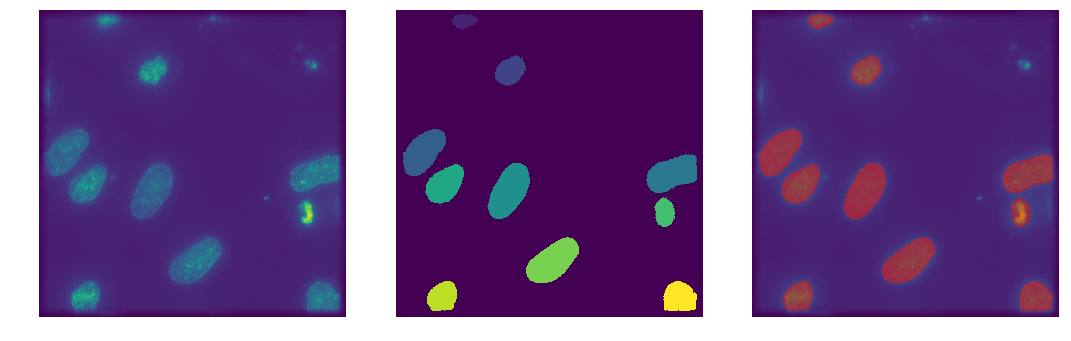

theshold =  400


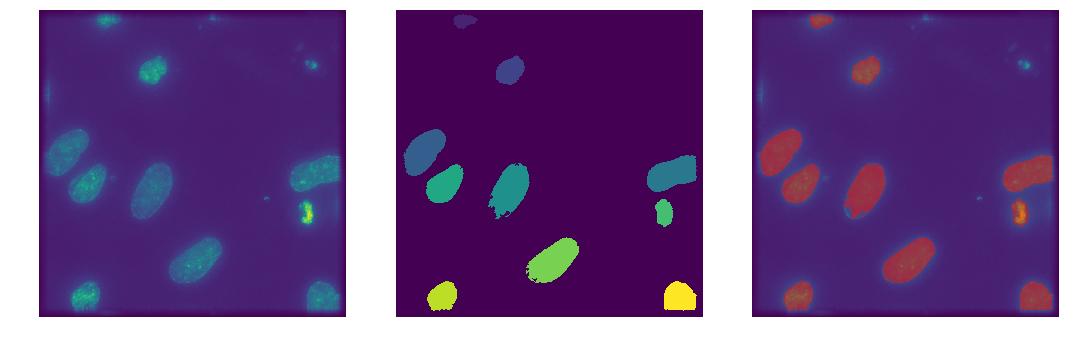

theshold =  450


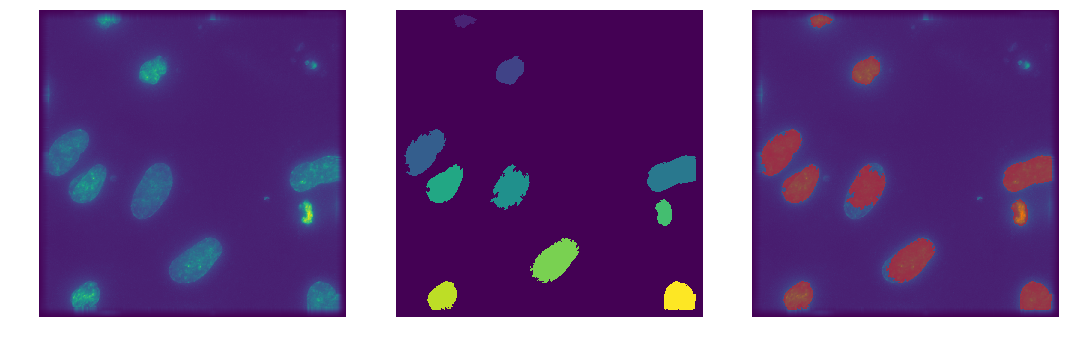

theshold =  500


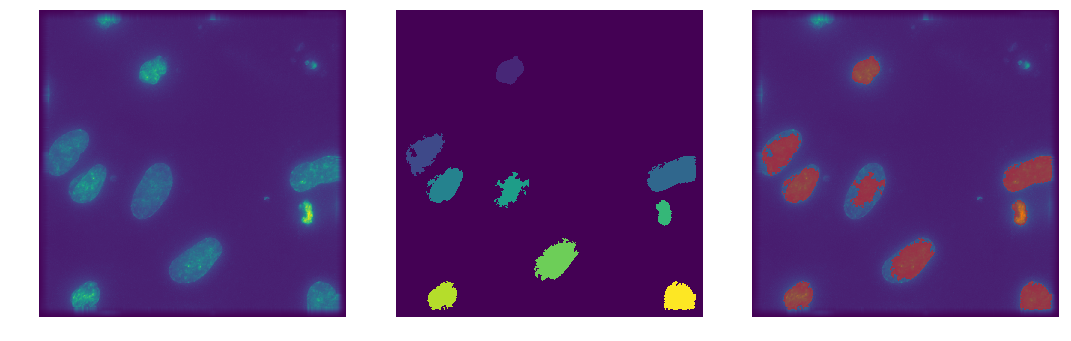

theshold =  550


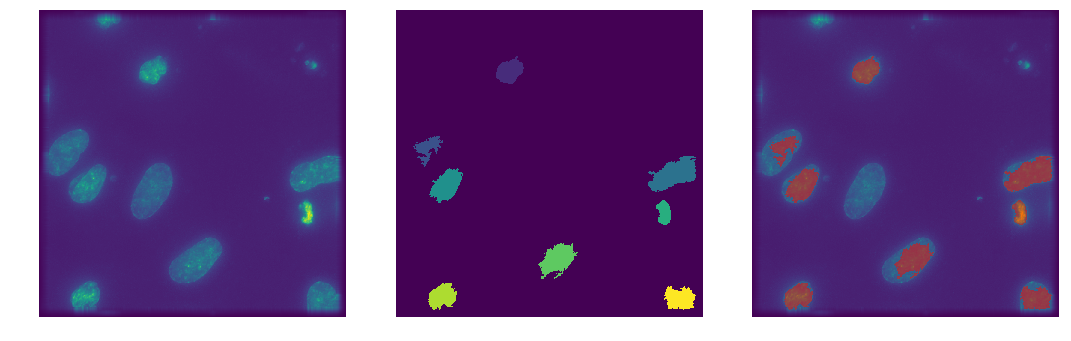

theshold =  600


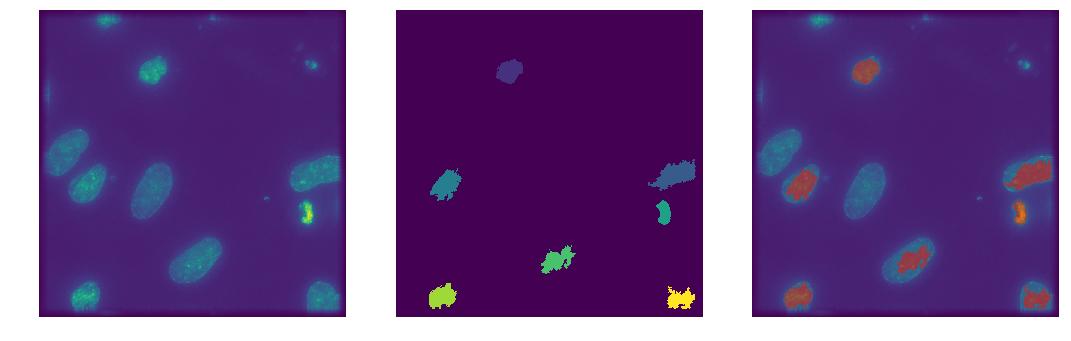

theshold =  650


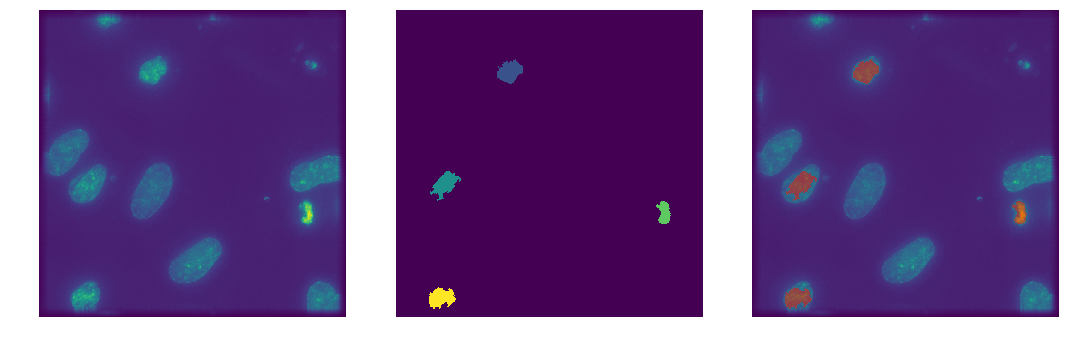

theshold =  700


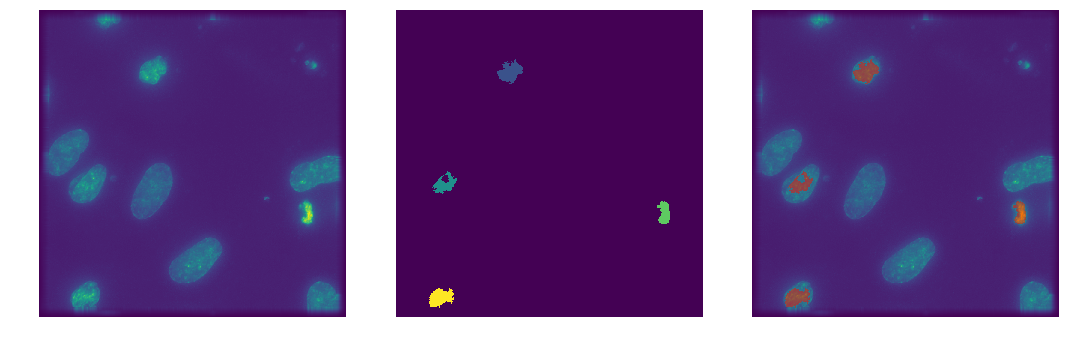

theshold =  750


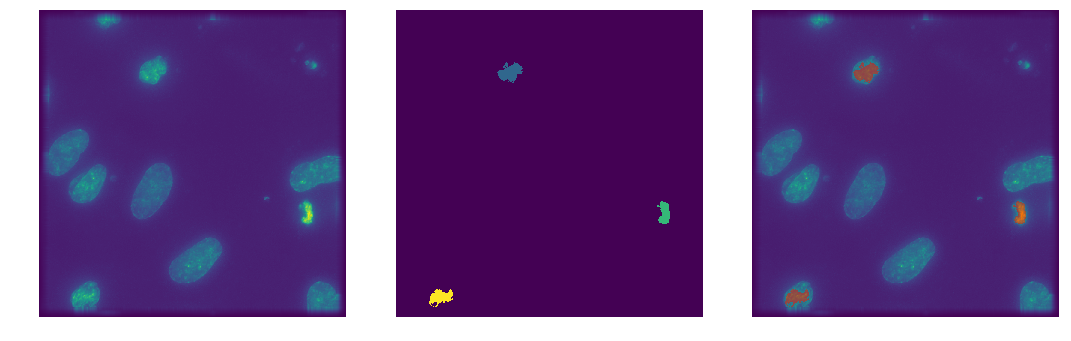

theshold =  800


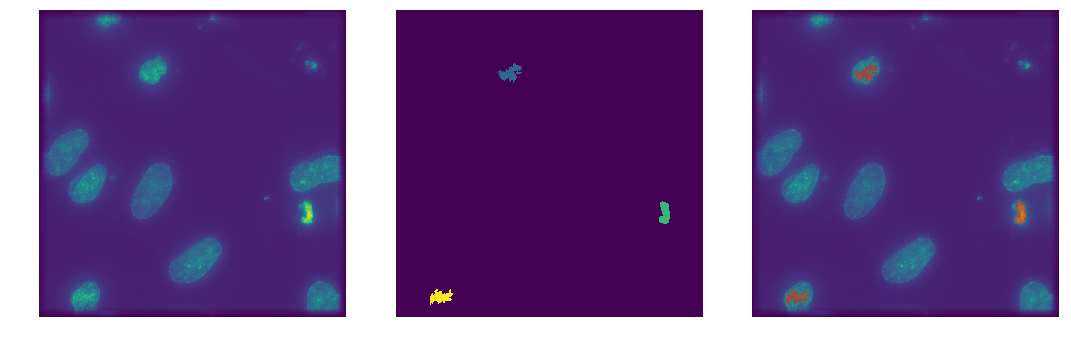

theshold =  850


/Users/tylermatheny/miniconda3/lib/python3.7/site-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Users/tylermatheny/miniconda3/lib/python3.7/site-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/Users/tylermatheny/miniconda3/lib/python3.7/site-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/Users/tylermatheny/miniconda3/lib/python3.7/site-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/Users/tylermatheny/miniconda3/lib/python3.7/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/tylermatheny/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked eleme

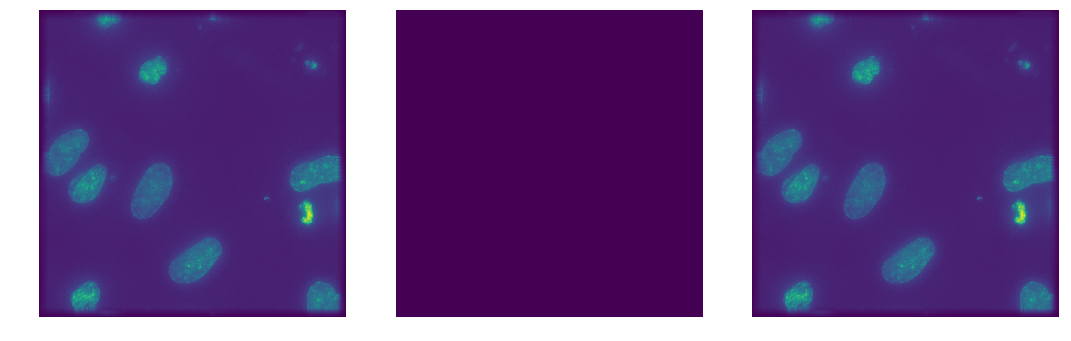

theshold =  900


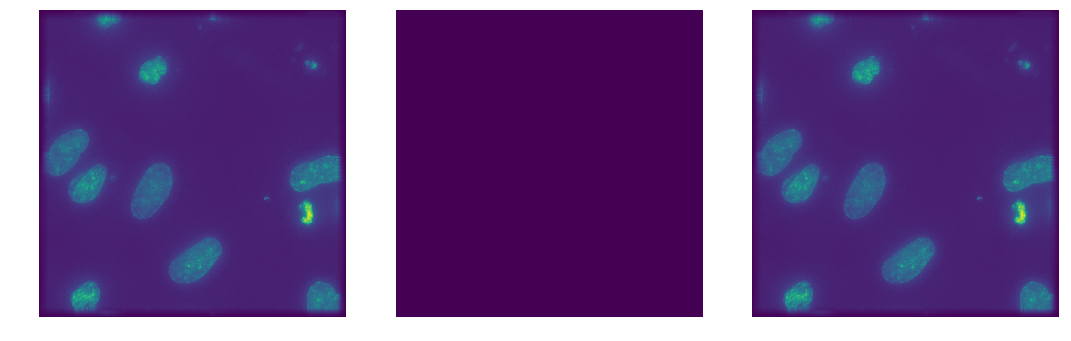

theshold =  950


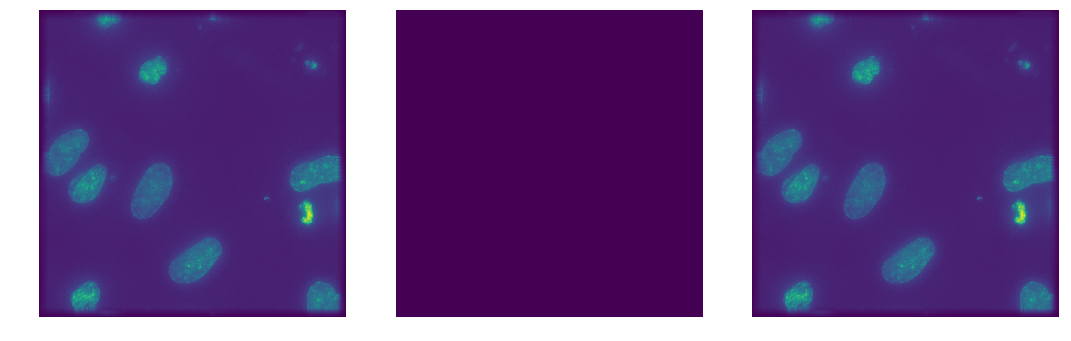

theshold =  1000


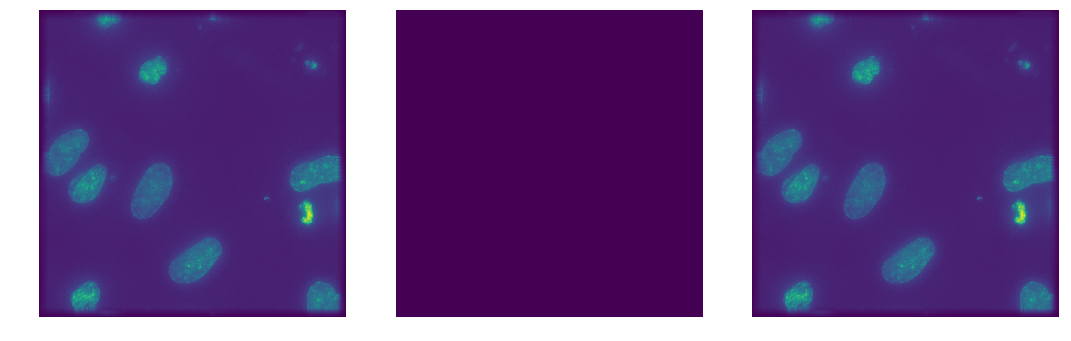

In [22]:
for thresh in range(0,1001,50):
    print('theshold = ', str(thresh))
    # thresholding
    nuc_max_proj = stack.maximum_projection(nuc)
    nuc_mask = segmentation.thresholding(nuc_max_proj, threshold=thresh)
    nuc_mask = segmentation.clean_segmentation(nuc_mask, small_object_size=2000, fill_holes=True)

    # labeling
    nuc_label = segmentation.label_instances(nuc_mask)

    plot.plot_segmentation(nuc_max_proj, nuc_label, rescale=True, framesize=(15, 5))

As you can see above, thresholding may not generalize depending on the intensity of the staining

Model: "3ClassesModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, None, None, 1)]   0         
_________________________________________________________________
encoder_decoder (EncoderDeco (None, None, None, 32)    8086400   
_________________________________________________________________
final_conv (SameConv)        (None, None, None, 3)     105       
_________________________________________________________________
label_3 (Softmax)            (None, None, None, 3)     0         
Total params: 8,086,505
Trainable params: 8,086,505
Non-trainable params: 0
_________________________________________________________________
nucleus labels
 shape: (1024, 1024)
 dtype: int64


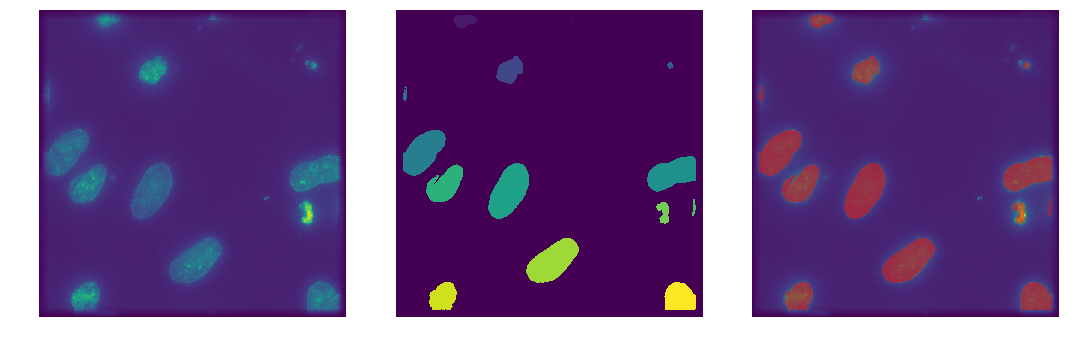

In [27]:
# load pretrained model
model_nuc = segmentation.unet_3_classes_nuc()
model_nuc.summary()

# instance segmentation
nuc_label = segmentation.apply_unet_3_classes(
    model_nuc, nuc_max_proj, target_size=500, test_time_augmentation=True)
print("nucleus labels")
print("\r shape: {0}".format(nuc_label.shape))
print("\r dtype: {0}".format(nuc_label.dtype))

plot.plot_segmentation(nuc_max_proj, nuc_label, rescale=True, framesize=(15, 5))

In [30]:
# apply watershed
cyt_max = stack.median_projection(cyt)
# cyt_max_new = stack.median_filter(cyt_max, kernel_shape="square", kernel_size=10)
block_size = 301
binary_adaptive = threshold_adaptive(cyt_max_new, block_size, offset=10)
new_cyt = binary_adaptive*cyt_max
new_cyt = stack.rescale(new_cyt, channel_to_stretch=0)
plt.imshow(new_cyt)
cell_label = segmentation.cell_watershed(new_cyt, nuc_label, threshold=2000, alpha=0.9)

AttributeError: module 'skimage' has no attribute 'threshold_adaptive'

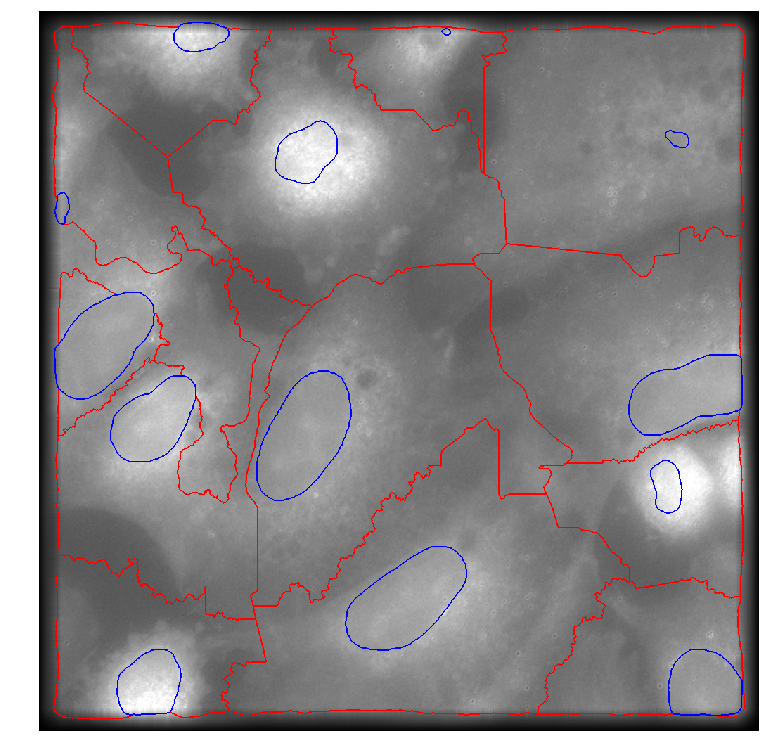

In [314]:
plot.plot_segmentation_boundary(cyt_max, cell_label, nuc_label, framesize=(10, 10), contrast=True)

/Users/tylermatheny/miniconda3/lib/python3.7/site-packages/skimage/filters/thresholding.py:229: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/Users/tylermatheny/miniconda3/lib/python3.7/site-packages/skimage/filters/thresholding.py:231: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '


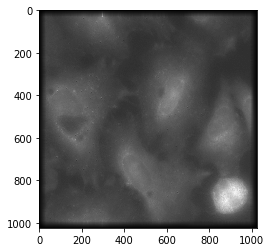

In [209]:
plt.imshow(cyt_max)
block_size = 201
binary_adaptive = threshold_adaptive(cyt_max, block_size, offset=20)


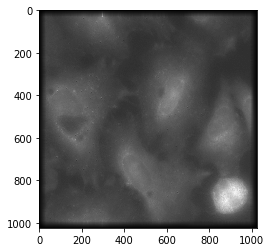

In [165]:
plt.imshow(cyt_max)

/Users/tylermatheny/miniconda3/lib/python3.7/site-packages/skimage/filters/thresholding.py:229: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/Users/tylermatheny/miniconda3/lib/python3.7/site-packages/skimage/filters/thresholding.py:231: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '


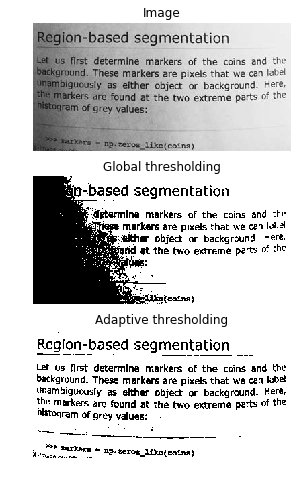

In [155]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu, threshold_adaptive


image = data.page()

global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

block_size = 35
binary_adaptive = threshold_adaptive(image, block_size, offset=10)

fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax0, ax1, ax2 = axes
plt.gray()

ax0.imshow(image)
ax0.set_title('Image')

ax1.imshow(binary_global)
ax1.set_title('Global thresholding')

ax2.imshow(binary_adaptive)
ax2.set_title('Adaptive thresholding')

for ax in axes:
    ax.axis('off')

plt.show()


In [7]:
# def convert(img, target_type_min, target_type_max, target_type):
#     imin = img.min()
#     imax = img.max()

#     a = (target_type_max - target_type_min) / (imax - imin)
#     b = target_type_max - a * imax
#     new_img = (a * img + b).astype(target_type)
#     return new_img

def extract_channels(decon, raw):
    
    nuc = decon[0,...]
    cyt = decon[1,...]
    brightfield = decon[2,...]
    
    nuc = stack.maximum_projection(nuc)
    cyt = stack.maximum_projection(cyt)
    brightfield = stack.maximum_projection(brightfield)
    return nuc, cyt, brightfield

# def find_nuclei(nuc):
#     # thresholding
#     nuc = nuc.astype(np.uint8)
#     plt.imshow(nuc)
#     nuc= cv2.bitwise_not(nuc)
#     th2 = cv2.adaptiveThreshold(nuc,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,255,20)    
#     nuc_mask = nuc_mask.astype(bool)
#     nuc_mask = segmentation.clean_segmentation(nuc_mask, small_object_size=2000, fill_holes=True)

    # labeling
#     nuc_label = segmentation.label_instances(nuc_mask)
#     plot.plot_segmentation(nuc, nuc_label, rescale=True, framesize=(15, 5))

    return th2

# def find_cells(nuc_label, cyt, alpha=.95):
#     # build watershed representation of the cells
#     cyt = stack.rescale(cyt, channel_to_stretch=0)
#     thresh = cv2.adaptiveThreshold(cyt, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 755, 10)
#     cell = cyt * thresh
#     watershed_relief = segmentation.get_watershed_relief(cell, nuc_label, alpha=alpha)

#     # build cell mask
#     cell_mask = segmentation.thresholding(cell, threshold=5)
#     cell_mask[nuc_label > 0] = True
#     cell_mask = segmentation.clean_segmentation(cell_mask, 
#                                                 small_object_size=2000, 
#                                                 fill_holes=True)

#     # apply watershed algorithm
#     cell_label = segmentation.apply_watershed(watershed_relief, nuc_label, cell_mask)
    
#     plot.plot_images([watershed_relief, cell_mask, cell_label], 
#                  titles=["Watershed relief", "Binary mask", "Labelled cells"], 
#                  framesize=(15, 10))
#     return cell_label

# def find_cells_unet(nuc, nuc_label, cyt):
#     # build watershed representation of the cells
#     cyt = stack.rescale(cyt, channel_to_stretch=0)
#     cyt = cv2.bitwise_not(new)
#     thresh = cv2.adaptiveThreshold(new, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 755, 20)
#     cell = cyt * thresh
         

#     model_cell = segmentation.unet_distance_edge_double()
#     model_cell.summary()

#     cell_label = segmentation.apply_unet_distance_double(
#     model_cell, 
#     nuc=nuc, 
#     cell=cell, 
#     nuc_label=nuc_label, 
#     target_size=150, test_time_augmentation=True)
#     plot.plot_segmentation(cell, cell_label, rescale=True, framesize=(15, 5))
#     return cell_label

# def detect_spots(rna, nuc_label, cell_label, rna_mip, nuc):
#     # parameters
#     voxel_size_z = 300
#     voxel_size_yx = 103
#     psf_z = 350
#     psf_yx = 150

#     # sigma
#     sigma_z, sigma_yx, sigma_yx = stack.get_sigma(voxel_size_z, voxel_size_yx, psf_z, psf_yx)

#     spots, threshold = detection.detect_spots(
#     rna, return_threshold=True, 
#     voxel_size_z=voxel_size_z, voxel_size_yx=voxel_size_yx, psf_z=psf_z, psf_yx=psf_yx)

#     (radius_z, radius_yx, radius_yx) = stack.get_radius(voxel_size_z, voxel_size_yx, psf_z, psf_yx)
#     plot.plot_detection(rna_mip, spots, radius=radius_yx, framesize=(10, 8), contrast=True)
    
#     spots_post_decomposition, dense_regions, reference_spot = detection.decompose_dense(
#     rna, spots, 
#     voxel_size_z, voxel_size_yx, psf_z, psf_yx,
#     alpha=0.7,  # alpha impacts the number of spots per candidate region
#     beta=1,  # beta impacts the number of candidate regions to decompose
#     gamma=5)  # gamma the filtering step to denoise the image
    
#     radius = 350
#     nb_min_spots = 4
#     spots_post_clustering, clusters = detection.detect_clusters(
#         spots_post_decomposition, 
#         voxel_size_z, voxel_size_yx, radius, nb_min_spots)
    
#     spots_no_ts, foci, ts = stack.remove_transcription_site(spots, clusters, nuc_label, ndim=2)
#     spots_in, spots_out = stack.identify_objects_in_region(nuc_label, spots, ndim=3)
    
#     fov_results = stack.extract_cell(
#         cell_label=cell_label, 
#         ndim=3, 
#         nuc_label=nuc_label, 
#         rna_coord=spots_no_ts, 
#         others_coord={"foci": foci, "transcription_site": ts},
#         image=rna_mip,
#         others_image={"dapi": nuc, "smfish": rna_mip})
#     return fov_results

In [8]:
nuc, cyt, brightfield = extract_channels(image,img)

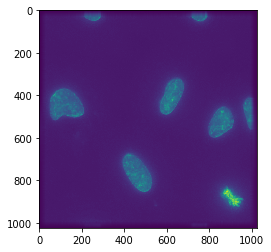

In [5]:
plt.imshow(nuc)

In [289]:
nuc

ndarray_inMrcFile([[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 1, ..., 1, 0, 0],
                   ...,
                   [0, 0, 1, ..., 1, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [290]:
th2

NameError: name 'th2' is not defined

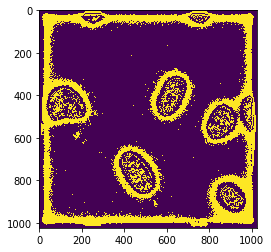

In [6]:
nuc_label = find_nuclei(nuc)
plt.imshow(nuc_label)

In [218]:
cell_label = find_cells(nuc_label, cyt, alpha=.95)

TypeError: bool is not supported yet. Use one of those dtypes instead: [<class 'numpy.int64'>].

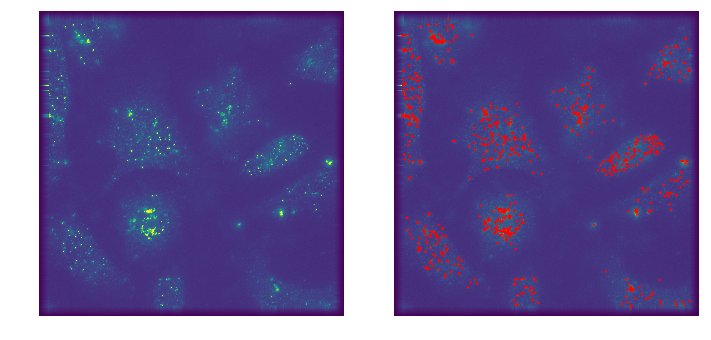

In [108]:
fov_results = detect_spots(rna, nuc_label, cell_label, rna_mip, nuc)



cell 0
 number of rna 58
 number of foci 0
 number of transcription sites 0


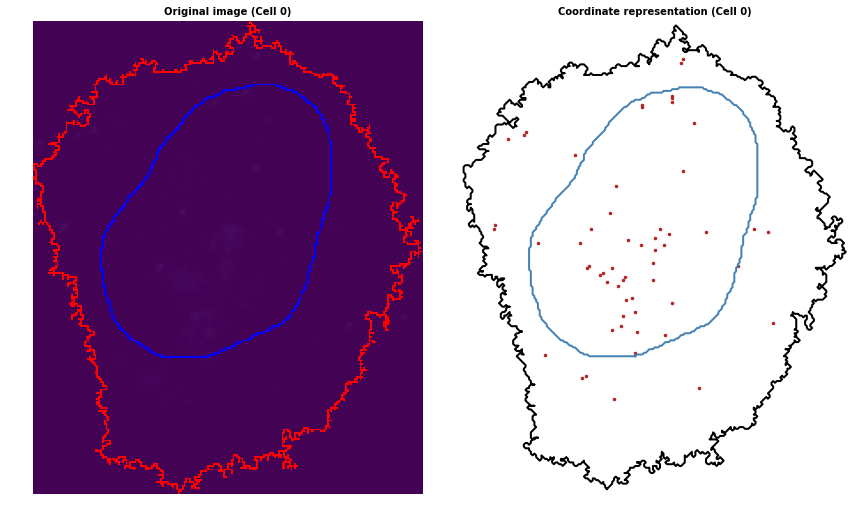

cell 1
 number of rna 135
 number of foci 0
 number of transcription sites 0


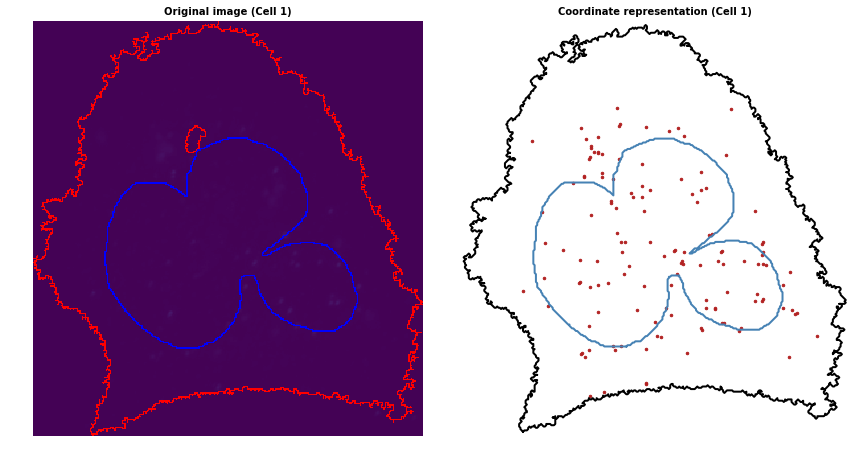

cell 2
 number of rna 0
 number of foci 0
 number of transcription sites 0


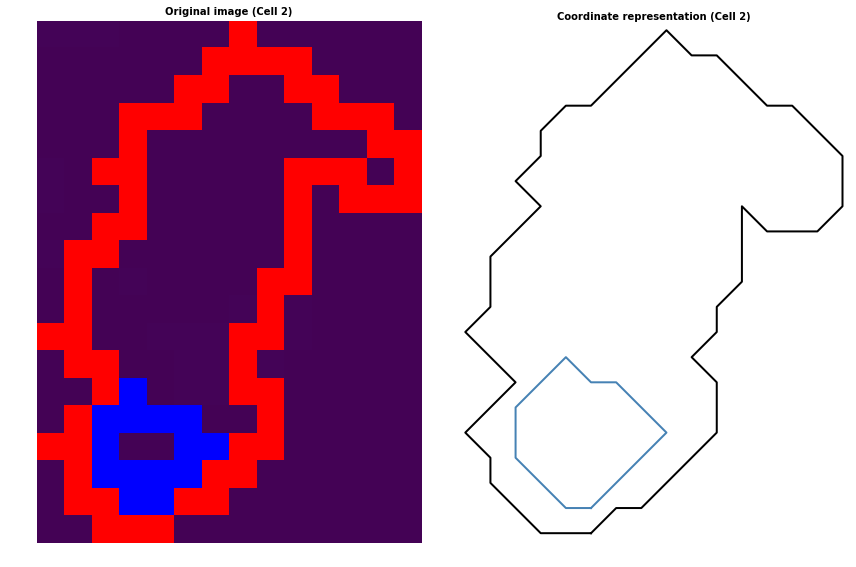

cell 3
 number of rna 102
 number of foci 0
 number of transcription sites 0


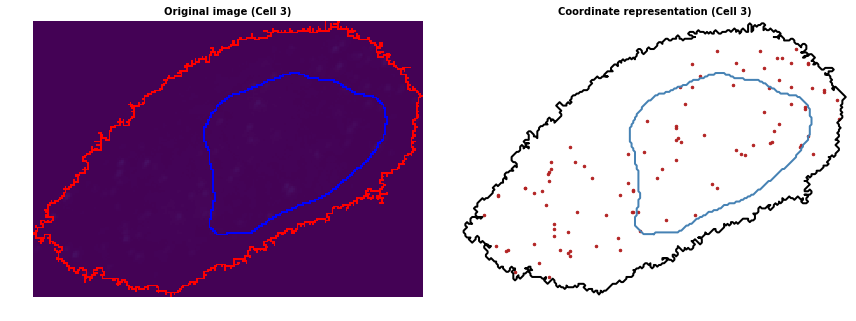

cell 4
 number of rna 111
 number of foci 1
 number of transcription sites 0


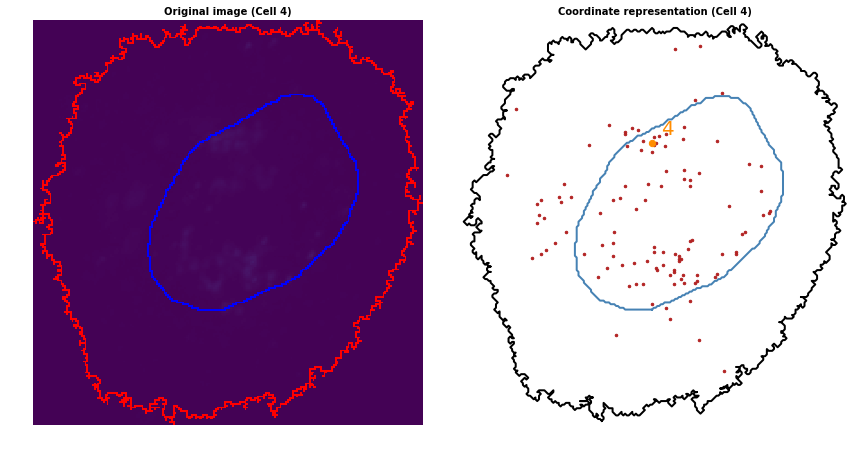

cell 5
 number of rna 68
 number of foci 0
 number of transcription sites 0


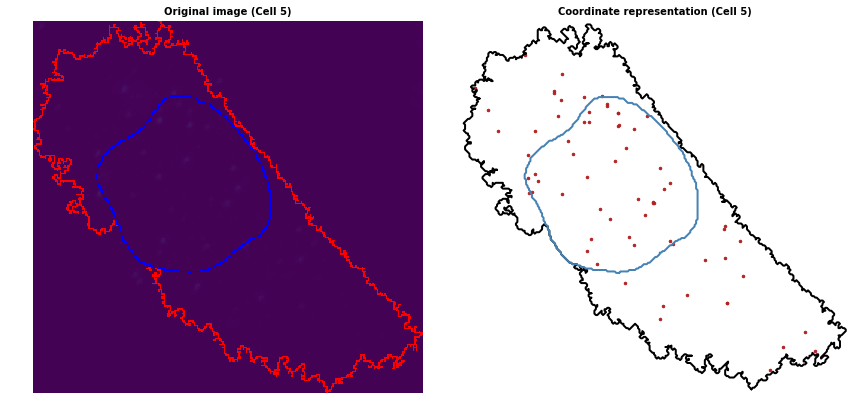

In [109]:
for i, cell_results in enumerate(fov_results):
    print("cell {0}".format(i))
    
    # get cell results
    cell_mask = cell_results["cell_mask"]
    cell_coord = cell_results["cell_coord"]
    nuc_mask = cell_results["nuc_mask"]
    nuc_coord = cell_results["nuc_coord"]
    rna_coord = cell_results["rna_coord"]
    foci_coord = cell_results["foci"]
    ts_coord = cell_results["transcription_site"]
    image_contrasted = cell_results["image"]
    print("\r number of rna {0}".format(len(rna_coord)))
    print("\r number of foci {0}".format(len(foci_coord)))
    print("\r number of transcription sites {0}".format(len(ts_coord)))
    
    # plot cell
    if i == 0:
        path = "images/plot_cell.png"
    else:
        path = None
    plot.plot_cell(
        ndim=3, cell_coord=cell_coord, nuc_coord=nuc_coord, 
        rna_coord=rna_coord, foci_coord=foci_coord, other_coord=ts_coord, 
        image=image_contrasted, cell_mask=cell_mask, nuc_mask=nuc_mask, 
        title="Cell {0}".format(i), framesize=(12, 10),
        path_output=path)

In [ ]:
(radius_z, radius_yx, radius_yx) = stack.get_radius(voxel_size_z, voxel_size_yx, psf_z, psf_yx)

In [ ]:
plot.plot_detection(rna_mip, spots, radius=radius_yx, framesize=(10, 8), contrast=True)

In [ ]:
spots_post_decomposition, dense_regions, reference_spot = detection.decompose_dense(
    rna, spots, 
    voxel_size_z, voxel_size_yx, psf_z, psf_yx,
    alpha=0.7,  # alpha impacts the number of spots per candidate region
    beta=1,  # beta impacts the number of candidate regions to decompose
    gamma=5)  # gamma the filtering step to denoise the image

In [ ]:


radius = 350
nb_min_spots = 4
spots_post_clustering, clusters = detection.detect_clusters(
    spots_post_decomposition, 
    voxel_size_z, voxel_size_yx, radius, nb_min_spots)
print("detected spots after clustering")
print("\r shape: {0}".format(spots_post_clustering.shape))
print("\r dtype: {0}".format(spots_post_clustering.dtype))
print("detected clusters")
print("\r shape: {0}".format(clusters.shape))
print("\r dtype: {0}".format(clusters.dtype))



In [ ]:


# plot
plot.plot_detection(rna_mip, 
                    spots=[spots_post_decomposition, clusters[:, :3]], 
                    shape=["circle", "polygon"], 
                    radius=[radius_yx, radius_yx*2], 
                    color=["red", "blue"],
                    linewidth=[1, 2], 
                    fill=[False, True], 
                    framesize=(10, 8), 
                    contrast=True)



In [ ]:
for i, cell_results in enumerate(fov_results):
    print("cell {0}".format(i))
    
    # get cell results
    cell_mask = cell_results["cell_mask"]
    cell_coord = cell_results["cell_coord"]
    nuc_mask = cell_results["nuc_mask"]
    nuc_coord = cell_results["nuc_coord"]
    rna_coord = cell_results["rna_coord"]
    foci_coord = cell_results["foci"]
    ts_coord = cell_results["transcription_site"]
    image_contrasted = cell_results["image"]
    print("\r number of rna {0}".format(len(rna_coord)))
    print("\r number of foci {0}".format(len(foci_coord)))
    print("\r number of transcription sites {0}".format(len(ts_coord)))
    
    # plot cell
    if i == 0:
        path = "images/plot_cell.png"
    else:
        path = None
    plot.plot_cell(
        ndim=3, cell_coord=cell_coord, nuc_coord=nuc_coord, 
        rna_coord=rna_coord, foci_coord=foci_coord, other_coord=ts_coord, 
        image=image_contrasted, cell_mask=cell_mask, nuc_mask=nuc_mask, 
        title="Cell {0}".format(i), framesize=(12, 10),
        path_output=path)

In [ ]:


spots_in, spots_out = stack.identify_objects_in_region(nuc_label, spots, ndim=3)
print("detected spots (inside nuclei)")
print("\r shape: {0}".format(spots_in.shape))
print("\r dtype: {0}".format(spots_in.dtype))
print("detected spots (outside nuclei)")
print("\r shape: {0}".format(spots_out.shape))
print("\r dtype: {0}".format(spots_out.dtype))



In [ ]:
fov_results = stack.extract_cell(
    cell_label=cell_label, 
    ndim=3, 
    nuc_label=nuc_label, 
    rna_coord=spots_no_ts, 
    others_coord={"foci": foci, "transcription_site": ts},
    image=rna_stretched,
    others_image={"dapi": nuc, "smfish": rna_stretched})
print("number of cells identified: {0}".format(len(fov_results)))


In [ ]:
for i, cell_results in enumerate(fov_results):
    print("cell {0}".format(i))
    
    # get cell results
    cell_mask = cell_results["cell_mask"]
    cell_coord = cell_results["cell_coord"]
    nuc_mask = cell_results["nuc_mask"]
    nuc_coord = cell_results["nuc_coord"]
    rna_coord = cell_results["rna_coord"]
    foci_coord = cell_results["foci"]
    ts_coord = cell_results["transcription_site"]
    image_contrasted = cell_results["image"]
    print("\r number of rna {0}".format(len(rna_coord)))
    print("\r number of foci {0}".format(len(foci_coord)))
    print("\r number of transcription sites {0}".format(len(ts_coord)))
    
    # plot cell
    if i == 0:
        path = "images/plot_cell.png"
    else:
        path = None
    plot.plot_cell(
        ndim=3, cell_coord=cell_coord, nuc_coord=nuc_coord, 
        rna_coord=rna_coord, foci_coord=foci_coord, other_coord=ts_coord, 
        image=image_contrasted, cell_mask=cell_mask, nuc_mask=nuc_mask, 
        title="Cell {0}".format(i), framesize=(12, 10),
        path_output=path)

In [ ]:
help(bigfish.segmentation.cell_watershed)

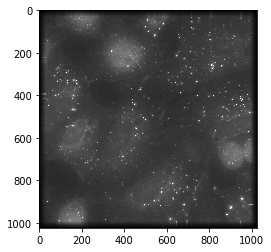

In [325]:
plt.imshow(stack.rescale(stack.maximum_projection(decon_image[1,...]), channel_to_stretch = 0))

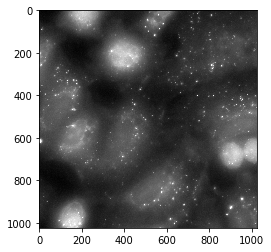

In [323]:
def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img

plt.imshow(stack.rescale(stack.maximum_projection(convert(raw_image[0:,1,...], 0, 255, 'uint8')), channel_to_stretch=0))